<h4>Complete Case Analysis (CCA) also called "List wise deletion" of cases, consists in discarding rows where values in any of the columns are missing.
Complete case analysis means literally analyzing only those observations for which there is information in all of the variables in the dataset</h4>

Your data should be <b>Missing completely at random (MCAR) & if data missing less than 5%</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/data_science_job.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [5]:
df.shape

(19158, 13)

In [6]:
# Check the missing value as percentage order

df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [7]:
# Check the missing value as percentage order. Second way or technique

null_var = df.isnull().sum() / df.shape[0]*100
null_var

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

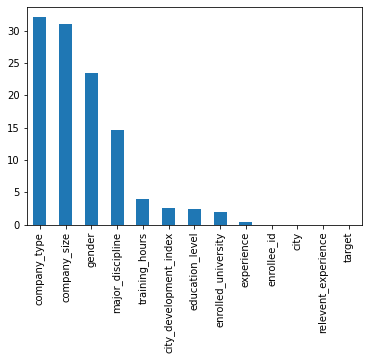

In [8]:
((df.isnull().mean()*100)).sort_values(ascending=False).plot(kind="bar")
plt.show()

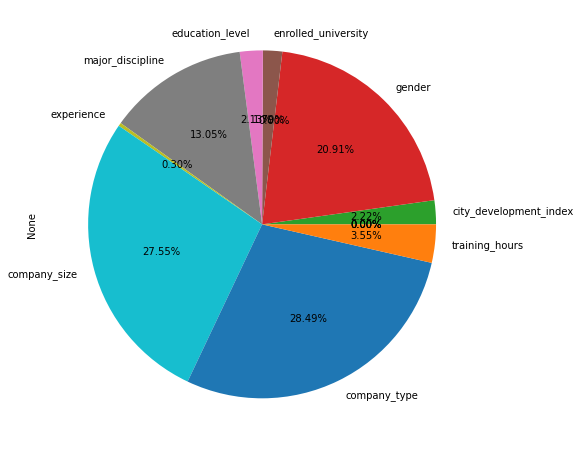

In [9]:
plt.figure(figsize=(8,8))
(df.isnull().mean()*100).plot(kind="pie", autopct="%.2f%%")
plt.show()

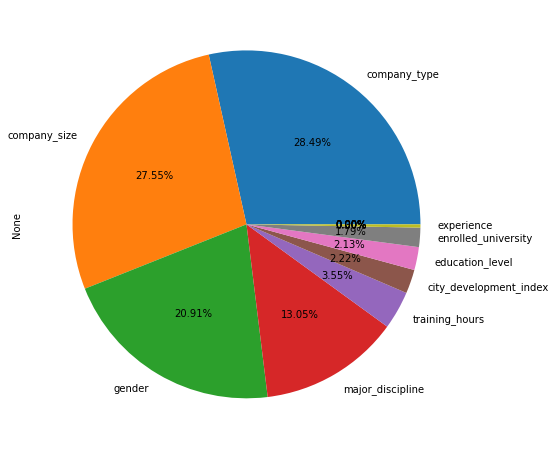

In [10]:
plt.figure(figsize=(8,8))
((df.isnull().mean()*100)).sort_values(ascending=False).plot(kind="pie", autopct="%.2f%%")
plt.show()

In [11]:
# Extract those columns that contain less than 5% missing value

cols = [col for col in df.columns if df[col].isnull().mean() < 0.05 and df[col].isnull().mean() > 0]

cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [12]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
13103,0.910,no_enrollment,Masters,10.0,64.0
1572,0.624,no_enrollment,Graduate,10.0,222.0
2735,0.920,no_enrollment,Graduate,11.0,168.0
15111,0.776,Full time course,Graduate,2.0,324.0
13521,0.920,no_enrollment,Masters,15.0,34.0


In [13]:
# Select those columns that contain categorical vlaues

df.select_dtypes(include=["object"]).columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type'],
      dtype='object')

In [14]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [15]:
# Let's check the observations if we drop all null value that containt missing vlaue less than 5%.
# And show after droping how many observations will be remaining in percentage order


len(df[cols].dropna()) / len(df)

0.8968577095730244

In [16]:
# Drop all those missing vlaue that contain less then 5% missing value

new_df = df[cols].dropna()

# Check the shape before and after droping NaN vlaue
df.shape, new_df.shape

((19158, 13), (17182, 5))

## For Numerical Columns

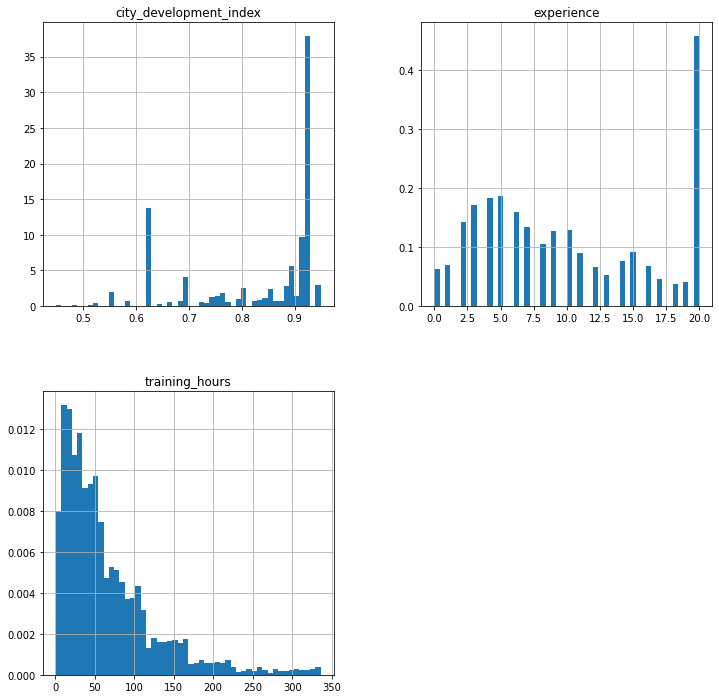

In [17]:
# Histogram of new dataframe

new_df.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

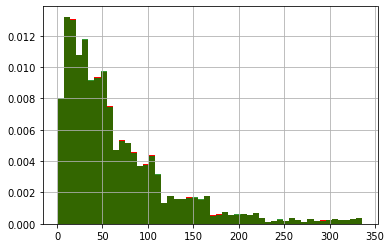

In [18]:
# particularly showing histogram for before and after removing missing value

fig = plt.figure()

ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions

new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)
plt.show()

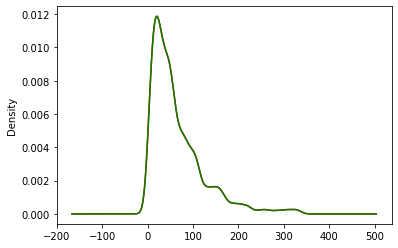

In [19]:
# We can see, there is no change before and after

fig = plt.figure()

ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red') # red color is occuras back of the green. overlay happend here

# data after cca
new_df['training_hours'].plot.density(color='green')
plt.show()

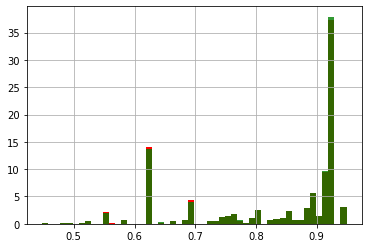

In [20]:
# We can see, there is no change before and after

fig = plt.figure()

ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)
plt.show()

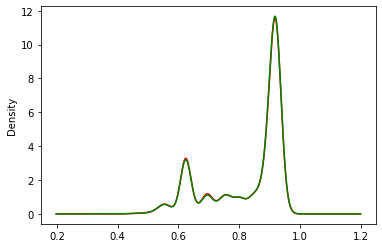

In [21]:
# We can see, there is no change before and after

fig = plt.figure()

ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')
plt.show()

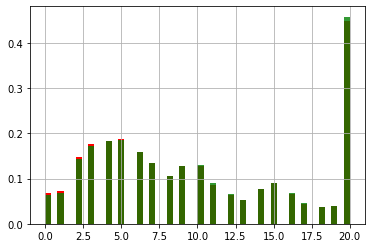

In [22]:
# We can see, there is no change before and after

fig = plt.figure()

ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)
plt.show()

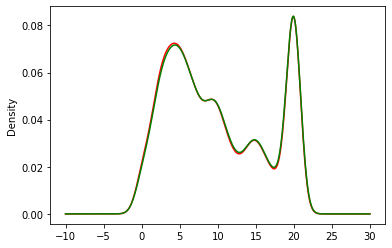

In [23]:
# We can see, there is no change before and after
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='green')
plt.show()

## For Categorical Columns

In [24]:
temp = pd.concat(objs=[
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, CCA data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

# If difference between orginal and CCA huge then problem. If less difference then all right

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [25]:
temp2 = pd.concat(objs=[
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp2.columns = ['original', 'cca']

temp2

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
